In [9]:

%load_ext autoreload
%autoreload 2
import _pathmagic
import pandas as pd
# from acanogan import acanogan_model,acanogan_predict, acanogan_test
from sklearn import metrics
import matplotlib.pyplot as plt
# import scikitplot as skplt
import scipy.stats as st
import sympy as sym
import numpy as np
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# def alpha_sign(x):
#     # if x<=0:
#     #     return 0
#     return x / (abs(x) + (1 / 0.2))


In [11]:
# x>0
a,x=sym.symbols("a,x")
alpha_sign=x / (x + (1 /a))

In [12]:
alpha_sign_diff=sym.Derivative(alpha_sign,x).doit()
alpha_sign_diff

-x/(x + 1/a)**2 + 1/(x + 1/a)

In [13]:
alpha_sign.subs({x:-0.1,a:0.5})
# alpha_sign_diff.subs({x:1,a:0.2})

-0.0526315789473684

/Users/minamotokeita/.virtualenvs/sensepro_anomaly_detection/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


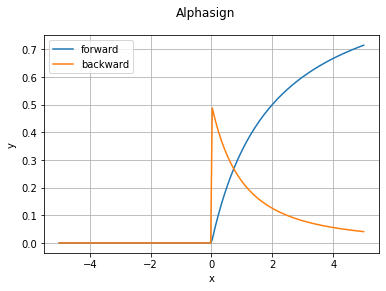

In [14]:
N = 200
xmin = -5
xmax = 5
def f(n):
   if n <= 0:
       return 0
   return alpha_sign.subs({x:n,a:0.5})

def g(n):
   if n <= 0:
       return 0
   return alpha_sign_diff.subs({x:n,a:0.5})

p = np.linspace(xmin, xmax, N)
# y = activator.forward(x, *args, **kwds)
# dx = activator.backward(x, y, *args, **kwds)

fig, ax = plt.subplots(1)
ax.plot( p, [f(p[k]) for k in range(N)],label="forward")
ax.plot( p, [g(p[k]) for k in range(N)] ,label="backward")
fig.suptitle("Alphasign")
ax.set_xticks([-4, -2, 0, 2, 4])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid()
ax.legend(loc="best")
# fig.savefig("{}.png".format(name))
fig.show()
#plt.close(fig)